In [1]:
import pandas as pd
import numpy as np
#Built-in z-score normalizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
#Dropping unnecessary columns
#Deleting column Unnamed:0
missing_values = ["n/a", "na", "--", " "]
df = pd.read_csv('bgg-15m-reviews.csv', na_values = missing_values)
df = df.drop(columns=['Unnamed: 0'])
df.head(4)

,user,rating,comment,ID,name
0,Torsten,10.0,NaN,30549,Pandemic
1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,Mike Mayer,10.0,NaN,30549,Pandemic


In [3]:
#Converting random noise values to numeric values for the rating column
df['rating'] = pd.to_numeric(df['rating'])

In [4]:
#Finding column frequency to delete columns having >60% null values 
#Column Frequency
df.isnull().sum(axis = 0)

user             66
rating            0
comment    12832316
ID                0
name              0
dtype: int64

In [7]:
#Replacing 0 with Null values in the rating colunm
df['rating'] = df['rating'].map(lambda x:x if x !=0 else None)

In [8]:
df.isnull().sum(axis = 0)

user             66
rating            0
comment    12832316
ID                0
name              0
dtype: int64

In [9]:
#Even after checking for all possible null values in the rating column, the number of null values is 0
#Comment Column has 81% Null Values. As it is all text data, we cannot fill these null values unless we use NLP. NLP is out of scopre for this project.

In [10]:
#Also finding if any particular tuple contains more than 60% null values
for item in df.isnull().sum(axis = 1)/len(df.columns)*100:
    if item > 60.0:
        #If you cannot see this print statement that means null values are not greater than 60%
        print('Rows which have greater than 60% null values')

In [11]:
#No tuples contain more than 60% null values. 

In [12]:
#Finding Outliers in the Rating using IQR 
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.0


In [13]:
#Q1 = 6, Q3 = 8 and IQR = 2
#((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))) will give a value which is less than 3
#As per the Outlier guidelines, all the ratings below 3 can be dropped.
#but we are keeping them as it is as they are important for our model.

In [14]:
# Describe before Data Normalization
df['rating'].describe()

count    1.582327e+07
mean     7.054843e+00
std      1.599649e+00
min      1.401300e-45
25%      6.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

<AxesSubplot:>

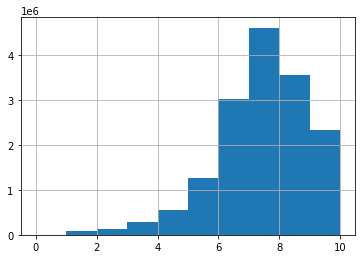

In [15]:
df['rating'].hist()

In [16]:
#Using the in-built z score calculator
z_score_rating = scaler.fit_transform(df[['rating']])

In [17]:
type(z_score_rating)

numpy.ndarray

In [18]:
z_score_rating_df = pd.DataFrame(z_score_rating, columns=['rating'])

In [19]:
#Describe after Data Normalization
z_score_rating_df.describe()

,rating
count,1.582327e+07
mean,-8.320200e-12
std,1.000000e+00
min,-4.410246e+00
25%,-6.594221e-01
50%,-3.428471e-02
75%,5.908526e-01
max,1.841127e+00


In [20]:
z_score_rating_df.mean(), z_score_rating_df.std()

(rating   -8.320200e-12
 dtype: float64,
 rating    1.0
 dtype: float64)

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

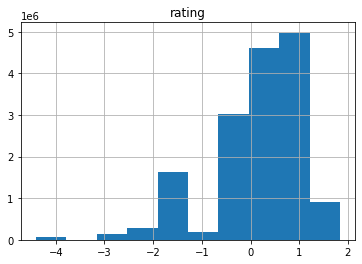

In [21]:
z_score_rating_df.hist()

In [22]:
#Write to csv
df.to_csv('Updated-bgg-15m-reviews.csv', index=False)

In [23]:
#Reading the 2nd Dataset
missing_values = ["n/a", "na", "--", " "]
df = pd.read_csv('modified-games_detailed_info.csv', na_values = missing_values)
df.head(4)

,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,bayesaverage,Board Game Rank
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Game: Pandemic', 'Medical: Diseases', 'Occup...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",96241,7.61567,7.51795,91
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Components: Black meeples', 'Components: Blu...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",96228,7.41884,7.31105,173
2,13,Catan,"In Catan (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Game: Catan', 'Promotional: Promo Board Games']",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",96213,7.16265,7.00045,381
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Card Drafting', 'Drafting', 'Hand Management...","['Game: 7 Wonders', 'Mechanic: Tableau Building']",['Antoine Bauza'],"['Antoine Bauza', 'Miguel Coimbra']","['Repos Production', 'ADC Blackfire Entertainm...",79873,7.76049,7.66214,51


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19230 entries, 0 to 19229
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19230 non-null  int64  
 1   primary             19230 non-null  object 
 2   description         19229 non-null  object 
 3   yearpublished       19230 non-null  int64  
 4   minplayers          19230 non-null  int64  
 5   maxplayers          19230 non-null  int64  
 6   playingtime         19230 non-null  int64  
 7   minplaytime         19230 non-null  int64  
 8   maxplaytime         19230 non-null  int64  
 9   minage              19230 non-null  int64  
 10  boardgamecategory   19009 non-null  object 
 11  boardgamemechanic   17681 non-null  object 
 12  boardgamefamily     14743 non-null  object 
 13  boardgamedesigner   18800 non-null  object 
 14  boardgameartist     13833 non-null  object 
 15  boardgamepublisher  19230 non-null  object 
 16  user

In [25]:
#Sum of null values
df.isnull().sum()

id                       0
primary                  0
description              1
yearpublished            0
minplayers               0
maxplayers               0
playingtime              0
minplaytime              0
maxplaytime              0
minage                   0
boardgamecategory      221
boardgamemechanic     1549
boardgamefamily       4487
boardgamedesigner      430
boardgameartist       5397
boardgamepublisher       0
usersrated               0
average                  0
bayesaverage             0
Board Game Rank          0
dtype: int64

In [26]:
#Replacing 0 values by None Values
df['yearpublished'] = df['yearpublished'].map(lambda x:x if x !=0 else None)
df['minplayers'] = df['minplayers'].map(lambda x:x if x !=0 else None)
df['maxplayers'] = df['maxplayers'].map(lambda x:x if x !=0 else None)
df['playingtime'] = df['playingtime'].map(lambda x:x if x !=0 else None)
df['minplaytime'] = df['minplaytime'].map(lambda x:x if x !=0 else None)
df['maxplaytime'] = df['maxplaytime'].map(lambda x:x if x !=0 else None)
df['minage'] = df['minage'].map(lambda x:x if x !=0 else None)

In [27]:
#Actual number of Null Values in the Dataset
df.isnull().sum()

id                       0
primary                  0
description              1
yearpublished          170
minplayers              51
maxplayers             167
playingtime            625
minplaytime            531
maxplaytime            625
minage                1173
boardgamecategory      221
boardgamemechanic     1549
boardgamefamily       4487
boardgamedesigner      430
boardgameartist       5397
boardgamepublisher       0
usersrated               0
average                  0
bayesaverage             0
Board Game Rank          0
dtype: int64

In [28]:
#Imputing the mean values in place of null values
df['yearpublished'].fillna(df['yearpublished'].mean(), inplace=True)
df['minplayers'].fillna(df['minplayers'].mean(), inplace=True)
df['maxplayers'].fillna(df['maxplayers'].mean(), inplace=True)
df['playingtime'].fillna(df['playingtime'].mean(), inplace=True)
df['minplaytime'].fillna(df['minplaytime'].mean(), inplace=True)
df['maxplaytime'].fillna(df['maxplaytime'].mean(), inplace=True)
df['minage'].fillna(df['minage'].mean(), inplace=True)

In [29]:
df.isnull().sum()

id                       0
primary                  0
description              1
yearpublished            0
minplayers               0
maxplayers               0
playingtime              0
minplaytime              0
maxplaytime              0
minage                   0
boardgamecategory      221
boardgamemechanic     1549
boardgamefamily       4487
boardgamedesigner      430
boardgameartist       5397
boardgamepublisher       0
usersrated               0
average                  0
bayesaverage             0
Board Game Rank          0
dtype: int64

In [30]:
#Dropping columns to find outliers and normalize data
df = df.drop(columns=['primary', 'description','boardgamecategory','boardgamemechanic', 'boardgamefamily', 'boardgamedesigner', 'boardgameartist', 'boardgamepublisher'] )

In [31]:
#Finding Outliers in the Rating using IQR 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                 172062.250000
yearpublished          15.000000
minplayers              0.000000
maxplayers              2.000000
playingtime            60.000000
minplaytime            40.000000
maxplaytime            60.000000
minage                  4.000000
usersrated            325.750000
average                 1.203658
bayesaverage            0.177217
Board Game Rank      9677.500000
dtype: float64


In [32]:
#Calculating IQR
print((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))

          id  yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0      False          False       False       False        False        False   
1      False          False       False       False        False        False   
2      False          False        True       False        False        False   
3      False          False       False       False        False        False   
4      False          False       False       False        False        False   
...      ...            ...         ...         ...          ...          ...   
19225  False          False       False       False        False        False   
19226  False          False       False       False        False        False   
19227  False          False        True       False        False        False   
19228  False          False       False       False        False        False   
19229  False          False       False       False        False        False   

       maxplaytime  minage 

In [33]:
#We decided to keep all the outlier values as all the tuples will be used in creating the model

In [34]:
#Without normalizing the dataset
df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,bayesaverage,Board Game Rank
count,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000,19230.000000
mean,101482.306032,2001.779958,2.034308,5.667471,99.839721,68.514840,99.839721,10.226837,822.717161,6.392653,5.689886,9646.834997
std,94272.241105,100.966970,0.677699,15.363055,1025.689285,473.452068,1025.689285,2.682643,3379.271776,0.929939,0.370425,5588.107451
min,1.000000,-3500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.048440,3.535930,1.000000
25%,10213.250000,2001.000000,2.000000,4.000000,30.000000,20.000000,30.000000,8.000000,56.000000,5.806900,5.510853,4808.250000
50%,72758.500000,2010.000000,2.000000,4.000000,45.000000,40.000000,45.000000,10.000000,120.000000,6.420350,5.550310,9618.500000
75%,182275.500000,2016.000000,2.000000,6.000000,90.000000,60.000000,90.000000,12.000000,381.750000,7.010558,5.688070,14485.750000
max,314040.000000,2021.000000,10.000000,999.000000,120000.000000,60000.000000,120000.000000,25.000000,96241.000000,9.687500,8.568580,19345.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'yearpublished'}>,
        <AxesSubplot:title={'center':'minplayers'}>],
       [<AxesSubplot:title={'center':'maxplayers'}>,
        <AxesSubplot:title={'center':'playingtime'}>,
        <AxesSubplot:title={'center':'minplaytime'}>],
       [<AxesSubplot:title={'center':'maxplaytime'}>,
        <AxesSubplot:title={'center':'minage'}>,
        <AxesSubplot:title={'center':'usersrated'}>],
       [<AxesSubplot:title={'center':'average'}>,
        <AxesSubplot:title={'center':'bayesaverage'}>,
        <AxesSubplot:title={'center':'Board Game Rank'}>]], dtype=object)

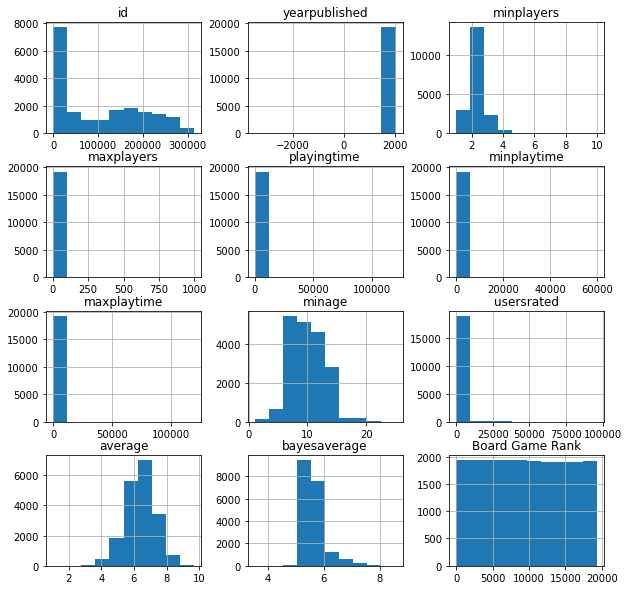

In [35]:
#histogram before normalization
df.hist(figsize=(10,10))

In [36]:
column_names = ['id', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'userrated', 'average', 'bayesaverage', 'Board Game Rank']

In [37]:
df

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,bayesaverage,Board Game Rank
0,30549,2008.0,2.0,4.0,45.000000,45.00000,45.000000,8.0,96241,7.61567,7.51795,91
1,822,2000.0,2.0,5.0,45.000000,30.00000,45.000000,7.0,96228,7.41884,7.31105,173
2,13,1995.0,3.0,4.0,120.000000,60.00000,120.000000,10.0,96213,7.16265,7.00045,381
3,68448,2010.0,2.0,7.0,30.000000,30.00000,30.000000,10.0,79873,7.76049,7.66214,51
4,36218,2008.0,2.0,4.0,30.000000,30.00000,30.000000,13.0,74959,7.62671,7.52038,89
...,...,...,...,...,...,...,...,...,...,...,...,...
19225,246345,2018.0,2.0,4.0,99.839721,68.51484,99.839721,7.0,30,5.08333,5.48989,16940
19226,195623,2016.0,2.0,5.0,30.000000,15.00000,30.000000,10.0,30,6.71667,5.51472,13942
19227,235943,2017.0,3.0,8.0,20.000000,20.00000,20.000000,8.0,30,5.16667,5.49304,16652
19228,284862,2019.0,2.0,2.0,25.000000,15.00000,25.000000,8.0,30,6.20333,5.51469,13944


In [38]:
#Creating modified df with fit_transformed scaler values
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns = column_names)

In [39]:
#Normalized df
normalized_df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,userrated,average,bayesaverage,Board Game Rank
count,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04,1.923000e+04
mean,-6.147506e-17,2.881040e-15,-3.805574e-16,-1.777620e-16,-5.314011e-16,5.751933e-16,-5.314011e-16,7.756175e-15,-9.340134e-16,1.254858e-15,-1.836671e-15,-8.407616e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.076499e+00,-5.449231e+01,-1.526245e+00,-3.038193e-01,-9.636670e-02,-1.426049e-01,-9.636670e-02,-3.439548e+00,-2.345883e-01,-5.746992e+00,-5.814969e+00,-1.726181e+00
25%,-9.681687e-01,-7.725084e-03,-5.062607e-02,-1.085405e-01,-6.809229e-02,-1.024731e-01,-6.809229e-02,-8.301125e-01,-2.268942e-01,-6.298995e-01,-4.833302e-01,-8.658944e-01
50%,-3.046979e-01,8.141530e-02,-5.062607e-02,-1.085405e-01,-5.346760e-02,-6.022908e-02,-5.346760e-02,-8.455958e-02,-2.079547e-01,2.978462e-02,-3.768079e-01,-5.070721e-03
75%,8.570423e-01,1.408422e-01,-5.062607e-02,2.164528e-02,-9.593526e-03,-1.798506e-02,-9.593526e-03,6.609933e-01,-1.304952e-01,6.644745e-01,-4.901398e-03,8.659534e-01
max,2.254781e+00,1.903646e-01,1.175433e+01,6.465891e+01,1.169002e+02,1.265874e+02,1.169002e+02,5.507087e+00,2.823708e+01,3.543171e+00,7.771525e+00,1.735546e+00


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'yearpublished'}>,
        <AxesSubplot:title={'center':'minplayers'}>],
       [<AxesSubplot:title={'center':'maxplayers'}>,
        <AxesSubplot:title={'center':'playingtime'}>,
        <AxesSubplot:title={'center':'minplaytime'}>],
       [<AxesSubplot:title={'center':'maxplaytime'}>,
        <AxesSubplot:title={'center':'minage'}>,
        <AxesSubplot:title={'center':'userrated'}>],
       [<AxesSubplot:title={'center':'average'}>,
        <AxesSubplot:title={'center':'bayesaverage'}>,
        <AxesSubplot:title={'center':'Board Game Rank'}>]], dtype=object)

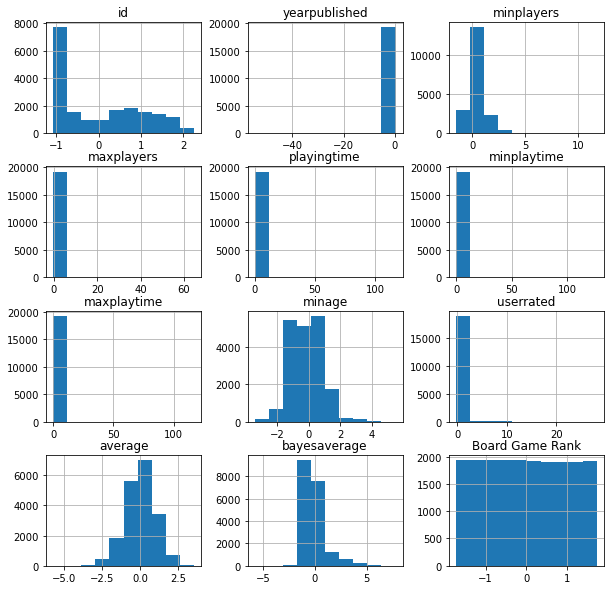

In [40]:
#Histogram of normalized dataset
normalized_df.hist(figsize=(10,10))

In [41]:
#Write to csv
df.to_csv('Updated-game-detailed-info.csv', index=False)